In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

import numpy as np
import pandas as pd

from random import random, uniform
from io import StringIO

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.lib.pretty import pretty

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
datastr = StringIO("""
Line	Label	Ingredients	Berries	Speciatly	BaseHelp	Use
Pichu	08/08 Pichu 3	1	8	B	2.5222	1
Squirtle	08/09 Squirtle 1	3	4	I	2.4000	1
Raichu	08/11 Raichu 12	3	19	B	5.5788	1
Houndour	08/11 Houndour 7	1	7	B	2.0281	1
Mankey	08/11 Mankey 10	1	9	B	2.6188	1
Ivysaur	08/11 Ivysaur 13	4	6	I	3.3540	1
Ivysaur	08/14 Ivysaur 12	4	6	I	3.8916	1
Dugtrio	08/14 Dugtrio 11	4	8	I	4.3732	1
Wartortle	08/14 Wartortle 12	5	6	I	3.7769	1
Larvitar	08/14 Larvitar 7	2	4	I	2.2775	1
Charmander	08/14 Charmander 9	3	6	I	3.4843	1
Ivysaur	08/15 Ivysaur 12	4	6	I	3.8916	1
Dugtrio	08/15 Dugtrio 12	4	8	I	4.3828	1
Wartortle	08/15 Wartortle 12	5	6	I	3.7769	1
Gastly	08/15 Gastly 7	2	5	I	2.8769	1
Larvitar	08/15 Larvitar 7	2	4	I	2.2775	1
Squirtle	08/14 Squirtle 10	3	4	I	2.4440	1
Squirtle	08/15 Squirtle 10	3	4	I	2.4440	1
Butterfree	08/15 Butterfree 10	2	15	B	4.2303	1
Wigglytuff	08/17 Wigglytuff 13	1	7	S	3.7305	1
Pikachu	08/17 Pikachu 13	2	15	B	4.5541	1
Riolu	08/21 Riolu 6	1	5	S	2.5974	1
Geodude	08/21 Geodude 4	2	3	I	1.9064	1
Bellsprout	08/21 Bellsprout 7	2	4	I	2.1024	1
Eevee	08/21 Eevee 4	1	6	S	3.2635	1
Charmeleon	08/21 Charmeleon 12	5	8	I	4.7558	1
""")

data = pd.read_csv(datastr, sep='\t', header=0)
data = data.set_index (["Line","Label"])
data.sort_index(axis=0, ascending=True, inplace=True)
data.head(30)

Ingredients  Berries Speciatly  BaseHelp  Use
Line       Label                                                             
Bellsprout 08/21 Bellsprout 7             2        4         I    2.1024    1
Butterfree 08/15 Butterfree 10            2       15         B    4.2303    1
Charmander 08/14 Charmander 9             3        6         I    3.4843    1
Charmeleon 08/21 Charmeleon 12            5        8         I    4.7558    1
Dugtrio    08/14 Dugtrio 11               4        8         I    4.3732    1
           08/15 Dugtrio 12               4        8         I    4.3828    1
Eevee      08/21 Eevee 4                  1        6         S    3.2635    1
Gastly     08/15 Gastly 7                 2        5         I    2.8769    1
Geodude    08/21 Geodude 4                2        3         I    1.9064    1
Houndour   08/11 Houndour 7               1        7         B    2.0281    1
Ivysaur    08/11 Ivysaur 13               4        6         I    3.3540    1
           08/14 Ivysaur 12               4        6         I    3.8916    1
           08/15 Ivysaur 12               4        6         I    3.8916    1
Larvitar   08/14 Larvitar 7               2        4         I    2.2775    1
           08/15 Larvitar 7               2        4         I    2.2775    1
Mankey     08/11 Mankey 10                1        9         B    2.6188    1
Pichu      08/08 Pichu 3                  1        8         B    2.5222    1
Pikachu    08/17 Pikachu 13               2       15         B    4.5541    1
Raichu     08/11 Raichu 12                3       19         B    5.5788    1
Riolu      08/21 Riolu 6                  1        5         S    2.5974    1
Squirtle   08/09 Squirtle 1               3        4         I    2.4000    1
           08/14 Squirtle 10              3        4         I    2.4440    1
           08/15 Squirtle 10              3        4         I    2.4440    1
Wartortle  08/14 Wartortle 12             5        6         I    3.7769    1
           08/15 Wartortle 12             5        6         I    3.7769    1
Wigglytuff 08/17 Wigglytuff 13            1        7         S    3.7305    1

In [3]:
def validate(item, ingredient_fraction, energy_m):
    berryBonus = 2 if item["Speciatly"] == 'B' else 1
    ingBonus = 2 if item["Speciatly"] == 'I' else 1

    ing = int(round(item["BaseHelp"]*energy_m*ingredient_fraction*ingBonus))
    ber = int(round(item["BaseHelp"]*energy_m*(1-ingredient_fraction)*berryBonus))

    return 1.0 if ing == int(item["Ingredients"]) and ber == int(item["Berries"]) else 0.0
    

In [4]:

recompute = False
nb_samples = 100000

if recompute:

    # extract unique evolution lines
    species = list(data.index.get_level_values(0).unique())
    
    # reshape the data once so we don't have to repeat the filter query for each random sample.
    obs_by_spec = dict(
        [ (name, list(map(lambda x:  x._asdict(), data.loc[name].itertuples() )))  for name in species ]
    ) 
    
    
    
    # setup storage, list are much faster to grow than dataframe.
    rnd_trials_list = []
    rnd_params_list = []

    for index_trial in range(0,nb_samples):

        ingredient_fraction = uniform(0, 0.5)
        energy_m = uniform(1.5, 3.0)

        results = []

        for sp in species:
            
            obs = obs_by_spec[sp]
            res = 1

            for item in obs:
                
                res *= validate(item, ingredient_fraction, energy_m)
                if(res == 0): 
                    break;

            results.append(res)
 
        if(sum(results) == 0): 
            continue

        rnd_trials_list.append(results)
        rnd_params_list.append([ingredient_fraction,energy_m])

        
    #convert list to dataframe
    rnd_trials = pd.DataFrame(rnd_trials_list, columns = species)
    rnd_params = pd.DataFrame(rnd_params_list, columns = ["ingredient%","energy_m"])
    

    rnd_params.to_pickle('./saved/rnd_params.pickle')
    rnd_trials.to_pickle('./saved/rnd_trials.pickle')
    

else:
    
    rnd_params = pd.read_pickle('./saved/rnd_params.pickle')
    rnd_trials = pd.read_pickle('./saved/rnd_trials.pickle')

In [5]:
rnd_trials.describe()
rnd_params.describe()

,Bellsprout,Butterfree,Charmander,Charmeleon,Dugtrio,Eevee,Gastly,Geodude,Houndour,Ivysaur,Larvitar,Mankey,Pichu,Pikachu,Raichu,Riolu,Squirtle,Wartortle,Wigglytuff
count,23438.000000,23438.000000,23438.000000,23438.000000,23438.000000,23438.000000,23438.000000,23438.000000,23438.000000,23438.000000,23438.000000,23438.000000,23438.000000,23438.000000,23438.000000,23438.000000,23438.000000,23438.000000,23438.000000
mean,0.274426,0.072574,0.111955,0.055508,0.064596,0.248571,0.166994,0.380920,0.319097,0.003243,0.256848,0.198310,0.228902,0.066943,0.040490,0.368803,0.189436,0.088617,0.191143
std,0.446234,0.259442,0.315318,0.228974,0.245817,0.432194,0.372978,0.485623,0.466137,0.056853,0.436904,0.398736,0.420135,0.249928,0.197109,0.482491,0.391863,0.284196,0.393209
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,ingredient%,energy_m
count,23438.000000,23438.000000
mean,0.199902,2.156412
std,0.066256,0.222426
min,0.063010,1.688448
25%,0.146150,1.975941
50%,0.201558,2.144839
75%,0.254484,2.328468
max,0.332932,2.728951


In [6]:
def get_valid_params(cols):

    df = rnd_trials[cols].copy()
    df = df.loc[(df!=0).all(axis=1)]
    return rnd_params.loc[df.index]


In [7]:
def plot_group(cols, samples=None):
    
    if(samples is None):
        samples = get_valid_params(cols)
    
    # Standard scale to compare cluster.
    
    fig, ax = plt.subplots()
    sns.scatterplot(data=samples,y="energy_m", x="ingredient%", alpha=0.8, ax=ax)
    plt.xlabel("Ingredient %",fontweight ='bold', size=14)
    plt.ylabel("Production Boost (M)", fontweight ='bold',size=14)
    plt.title(" ".join(cols))
    ax.set_xlim(0, 0.5)
    ax.set_ylim(1.5, 3)
    
    display(fig)
    plt.close()
    


,ingredient%,energy_m
count,6432.000000,6432.000000
mean,0.200403,2.366079
std,0.025801,0.153891
min,0.143406,2.022229
25%,0.179912,2.247772
50%,0.200228,2.364458
75%,0.220304,2.484122
max,0.261761,2.728951


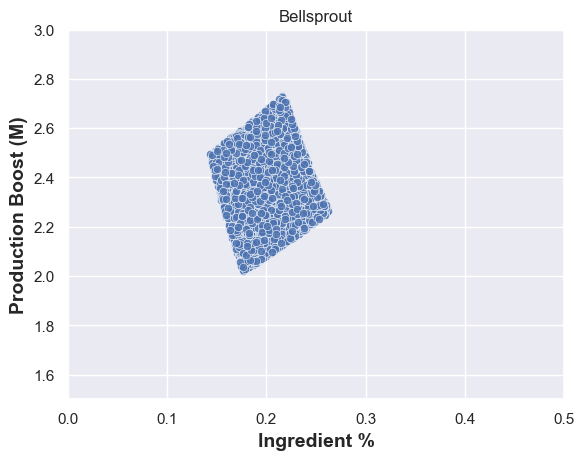

,ingredient%,energy_m
count,1701.000000,1701.000000
mean,0.208743,2.244637
std,0.024092,0.076442
min,0.162841,2.070877
25%,0.188711,2.186740
50%,0.209802,2.244558
75%,0.228520,2.304394
max,0.255299,2.420818


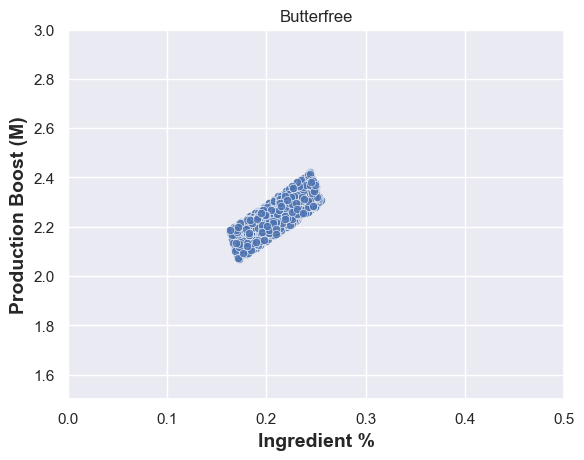

,ingredient%,energy_m
count,2624.000000,2624.000000
mean,0.199993,2.146692
std,0.017294,0.092541
min,0.162500,1.940933
25%,0.186148,2.074973
50%,0.199421,2.143272
75%,0.213208,2.220507
max,0.239656,2.356473


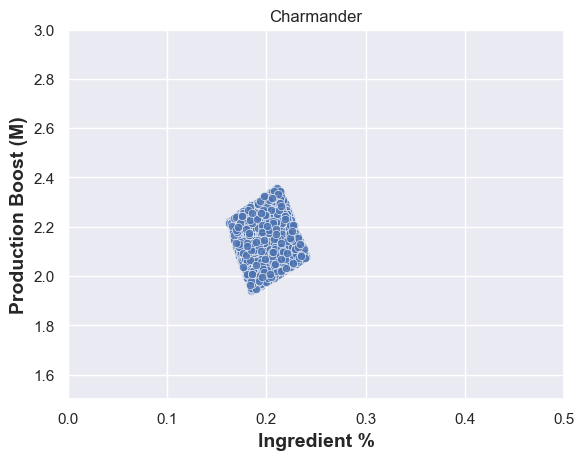

,ingredient%,energy_m
count,1301.000000,1301.000000
mean,0.237481,2.206432
std,0.012230,0.068356
min,0.209962,2.056736
25%,0.227382,2.152386
50%,0.236959,2.208444
75%,0.246476,2.260119
max,0.266816,2.358268


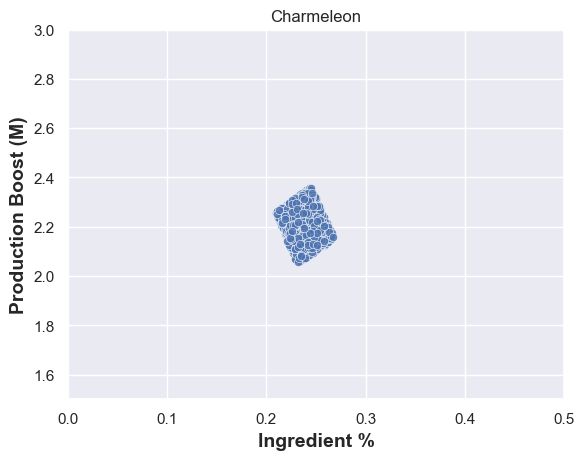

,ingredient%,energy_m
count,1514.000000,1514.000000
mean,0.200292,2.282934
std,0.012943,0.073357
min,0.172194,2.118279
25%,0.190943,2.227609
50%,0.199417,2.278829
75%,0.210215,2.341183
max,0.228937,2.451186


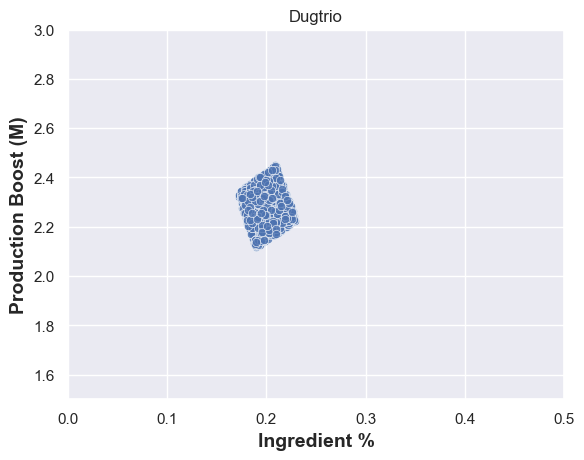

,ingredient%,energy_m
count,5826.000000,5826.000000
mean,0.140322,2.136726
std,0.036381,0.125092
min,0.072153,1.839402
25%,0.108273,2.045889
50%,0.141461,2.135398
75%,0.171453,2.225146
max,0.213383,2.447780


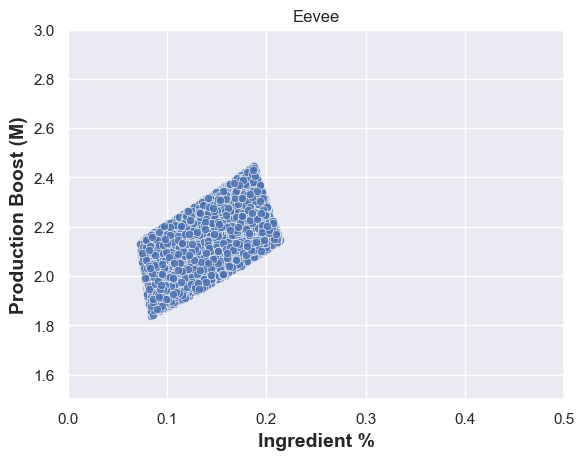

,ingredient%,energy_m
count,3914.000000,3914.000000
mean,0.166737,2.077220
std,0.021807,0.110870
min,0.121052,1.831092
25%,0.149089,1.992692
50%,0.167071,2.073181
75%,0.183566,2.164740
max,0.216374,2.336920


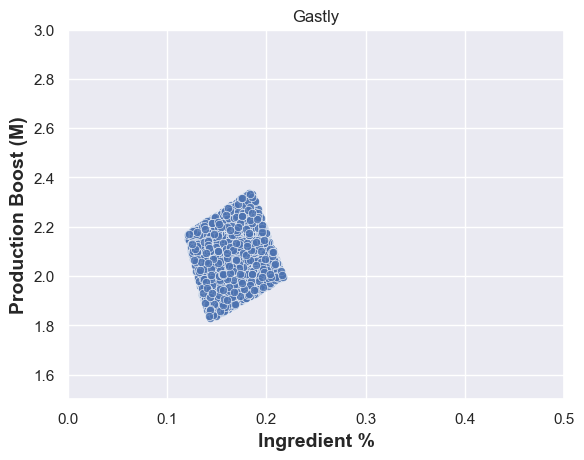

,ingredient%,energy_m
count,8928.000000,8928.000000
mean,0.250595,2.086029
std,0.033072,0.170422
min,0.178100,1.710054
25%,0.225391,1.955132
50%,0.249764,2.078543
75%,0.274707,2.219152
max,0.332367,2.489515


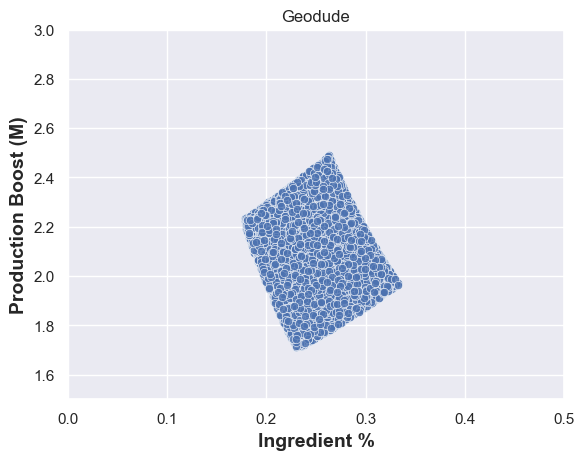

,ingredient%,energy_m
count,7479.000000,7479.000000
mean,0.216370,2.209524
std,0.050961,0.160226
min,0.119318,1.852994
25%,0.173247,2.083734
50%,0.218120,2.208773
75%,0.260622,2.334812
max,0.315081,2.583286


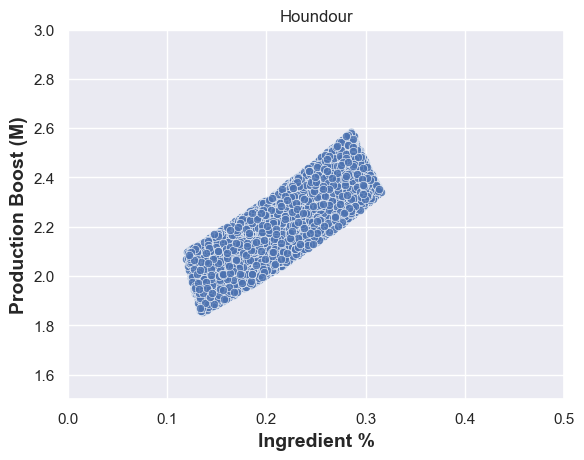

,ingredient%,energy_m
count,76.000000,76.000000
mean,0.248981,2.204968
std,0.005576,0.019227
min,0.239373,2.167574
25%,0.244087,2.189207
50%,0.249137,2.204954
75%,0.253604,2.218655
max,0.258807,2.246663


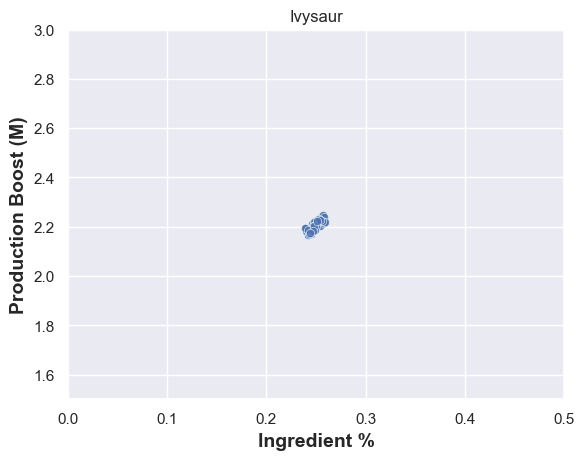

,ingredient%,energy_m
count,6020.000000,6020.000000
mean,0.199859,2.185678
std,0.025792,0.143496
min,0.143917,1.869155
25%,0.179556,2.073330
50%,0.199365,2.183160
75%,0.219863,2.296196
max,0.261375,2.521413


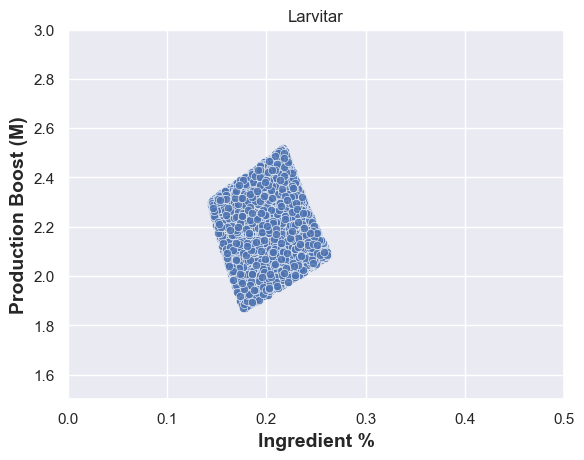

,ingredient%,energy_m
count,4648.000000,4648.000000
mean,0.177652,2.092783
std,0.042920,0.122414
min,0.096272,1.816108
25%,0.141603,1.998705
50%,0.178569,2.090483
75%,0.214712,2.187697
max,0.259501,2.376870


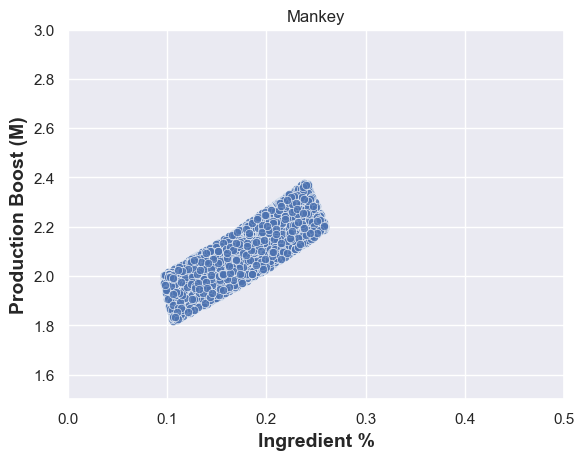

,ingredient%,energy_m
count,5365.000000,5365.000000
mean,0.194031,1.971457
std,0.046677,0.127278
min,0.105673,1.688448
25%,0.154472,1.872443
50%,0.194901,1.971120
75%,0.233815,2.069687
max,0.284680,2.275599


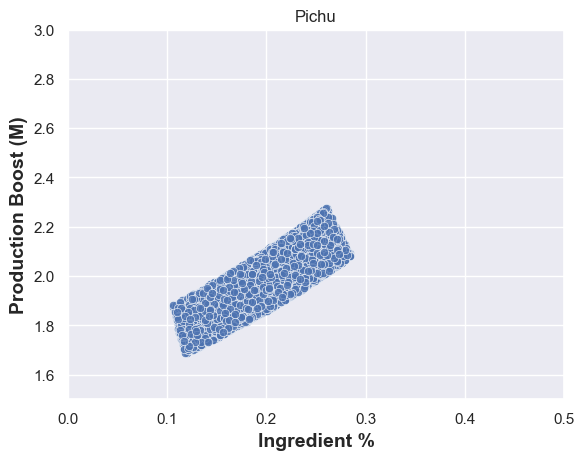

,ingredient%,energy_m
count,1569.000000,1569.000000
mean,0.208369,2.081893
std,0.024094,0.070016
min,0.164018,1.925487
25%,0.187177,2.026632
50%,0.208623,2.080344
75%,0.228286,2.134963
max,0.255339,2.240794


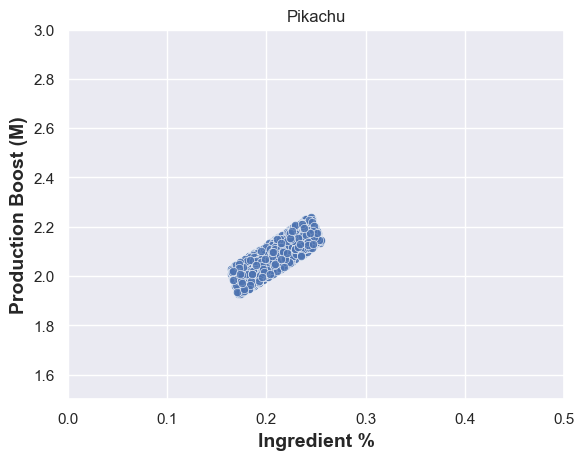

,ingredient%,energy_m
count,949.000000,949.000000
mean,0.238715,2.236351
std,0.017908,0.058800
min,0.205487,2.111556
25%,0.223228,2.190002
50%,0.238114,2.236612
75%,0.254323,2.283976
max,0.274496,2.370537


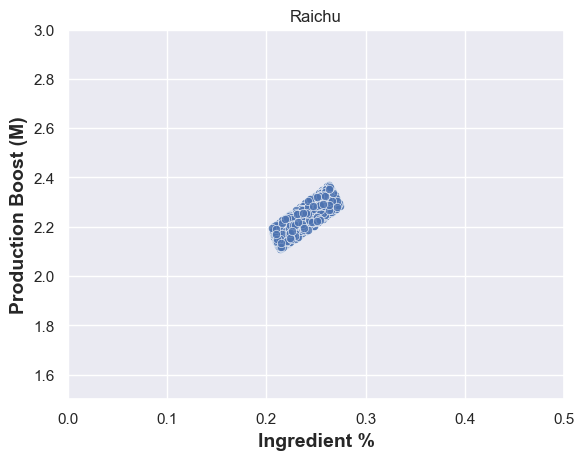

,ingredient%,energy_m
count,8644.000000,8644.000000
mean,0.163924,2.299767
std,0.041560,0.156774
min,0.084509,1.929166
25%,0.128674,2.187401
50%,0.164592,2.299926
75%,0.199171,2.410527
max,0.248560,2.688512


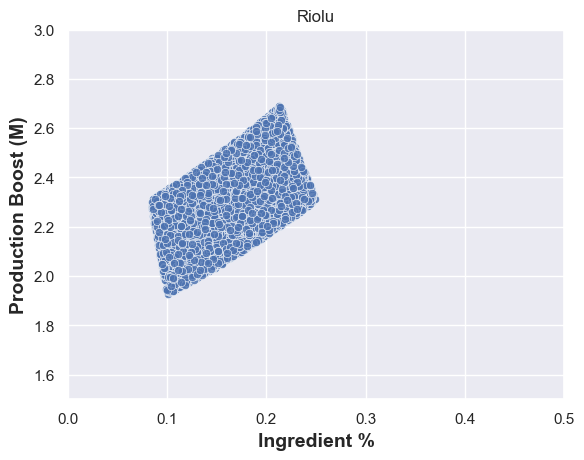

,ingredient%,energy_m
count,4440.000000,4440.000000
mean,0.273017,2.264791
std,0.022585,0.125369
min,0.220893,1.981074
25%,0.256487,2.168407
50%,0.272862,2.264984
75%,0.289117,2.362759
max,0.328181,2.553643


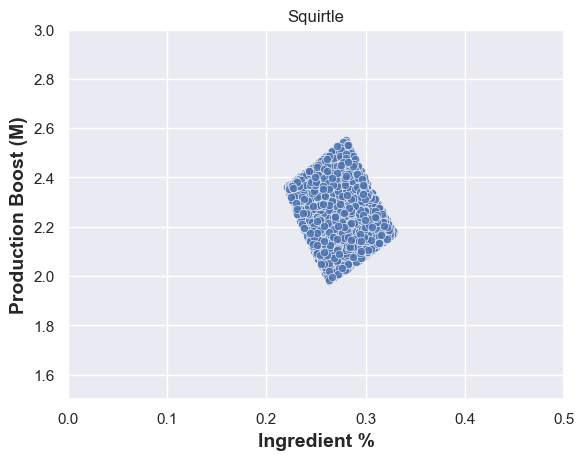

,ingredient%,energy_m
count,2077.000000,2077.000000
mean,0.294276,2.248602
std,0.015443,0.085000
min,0.258305,2.057096
25%,0.282479,2.184794
50%,0.294359,2.246160
75%,0.305441,2.313572
max,0.332932,2.441890


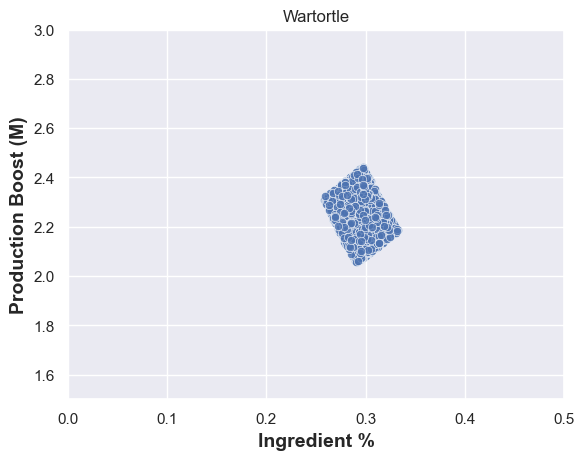

,ingredient%,energy_m
count,4480.000000,4480.000000
mean,0.122867,2.138227
std,0.032350,0.109977
min,0.063010,1.880194
25%,0.095017,2.058606
50%,0.123554,2.137721
75%,0.150638,2.215919
max,0.186479,2.407869


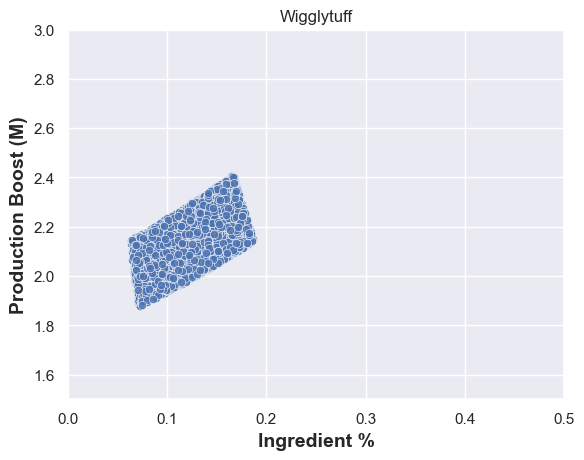

In [8]:
# Display individual Pokémon

all_portraits = []

for col in rnd_trials.columns:
    pts = get_valid_params([col]).copy()
    display(pts.describe())
    plot_group([col],pts)
    pts["group"] = col
    all_portraits.append(pts)



In [9]:
# Save for next sheet.
df = pd.concat(all_portraits)
df.head()
df.to_pickle('./saved/portrait.pickle')



# I tried to plot these on the same graph... terrible idea.

#df = df.sample(int(0.05*len(df.index)))
#fig, ax = plt.subplots()
#sns.scatterplot(data=df,x="ingredient%", y="energy_m",alpha=0.8, hue="group", style="group", ax=ax, linewidth=0) #hue_order=orders
#sns.move_legend(
#    ax, "lower center",
#    bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False
#)

    

,ingredient%,energy_m,group
2,0.226237,2.169056,Bellsprout
8,0.216000,2.690218,Bellsprout
14,0.189163,2.153534,Bellsprout
20,0.213582,2.616604,Bellsprout
24,0.199540,2.205937,Bellsprout


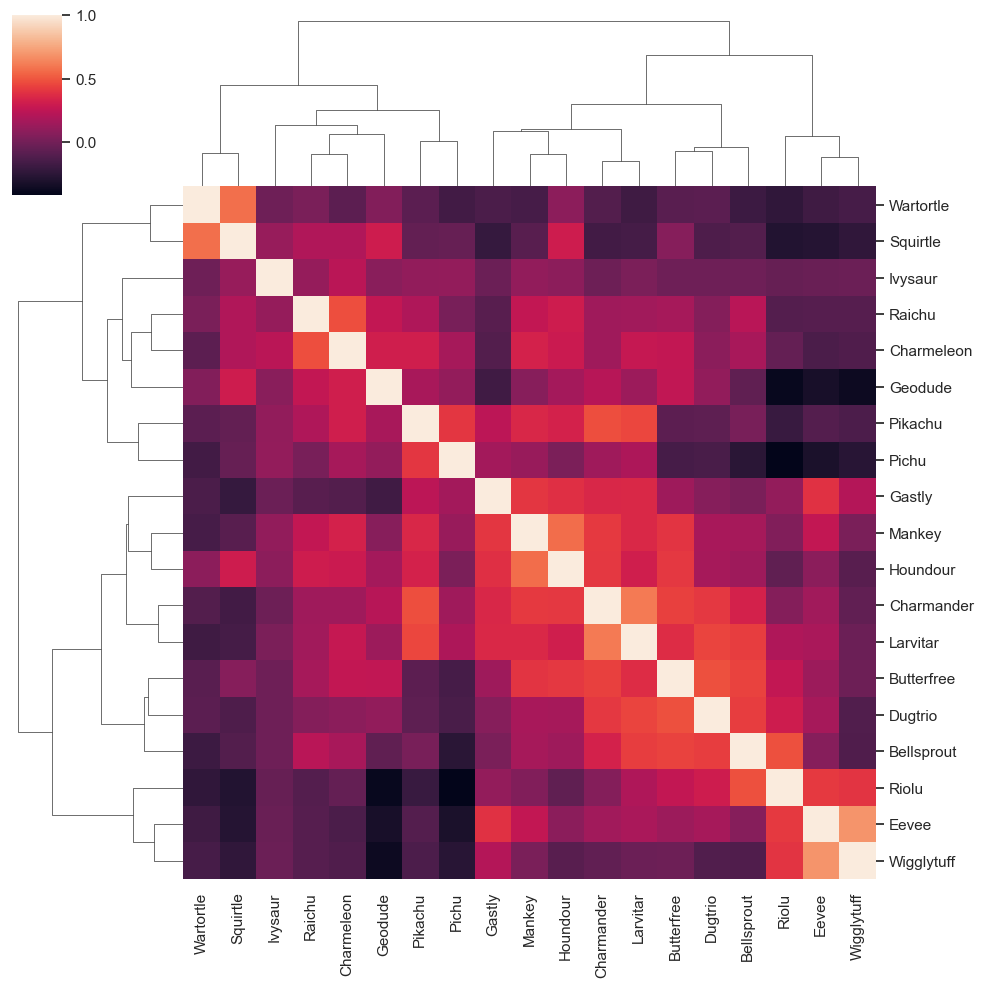

In [10]:
correl = rnd_trials.corr()

from scipy.cluster import hierarchy
linkage_matrix = hierarchy.linkage(correl, method='ward', metric='euclidean', optimal_ordering=True)

clust = sns.clustermap(correl, row_linkage=linkage_matrix, col_linkage=linkage_matrix)

In [11]:
def merge_ratio(a, b):
    
    # Count non zero before merge: a
    df = rnd_trials[a].copy()
    df = df.loc[(df!=0).all(axis=1)]
    size1 = len(df.index);
    
    # Count non zero before merge: b
    df = rnd_trials[b].copy()
    df = df.loc[(df!=0).all(axis=1)]
    size2 = len(df.index);
     
    if(size1==0 or size2==0): return 0;
    before = max(size1,size2)
    
    # Count non zero after merge
    df = rnd_trials[a + b].copy()
    df = df.loc[(df!=0).all(axis=1)]
    after = len(df.index);
       
    return after / before
    

In [12]:
# Here we keep merging into bigger cluster 
# while keeping intersection(a,b) above some fraction of max(a,b)

tresh = 0.15

n = len(correl.index)

output =  [None] * (2*n-1)

for i in range(0,n):
    output[i] = [correl.index[i]]

for i in range(0,n-1):
    
    a = int(linkage_matrix[i,0])   
    b = int(linkage_matrix[i,1])
    
    if output[a] == None or output[b] == None:
        output[n+i] = None
        continue

    if( merge_ratio(output[a], output[b]) > tresh):
        output[n+i] = output[a] + output[b]
        output[a] = None
        output[b] = None
        
    else:
        output[n+i] = None
    
output = list(filter(lambda x: x != None, output))

,ingredient%,energy_m
count,6432.000000,6432.000000
mean,0.200403,2.366079
std,0.025801,0.153891
min,0.143406,2.022229
25%,0.179912,2.247772
50%,0.200228,2.364458
75%,0.220304,2.484122
max,0.261761,2.728951


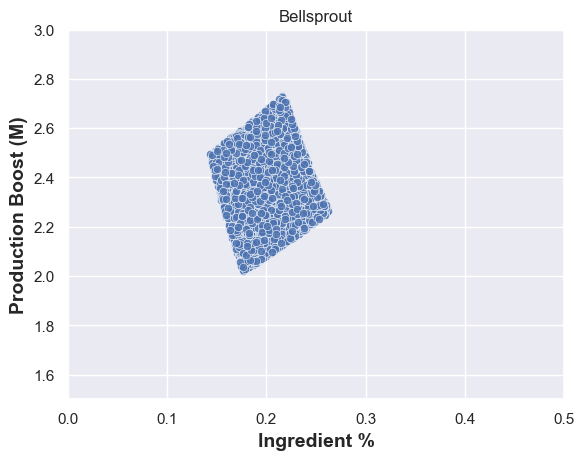

,ingredient%,energy_m
count,8928.000000,8928.000000
mean,0.250595,2.086029
std,0.033072,0.170422
min,0.178100,1.710054
25%,0.225391,1.955132
50%,0.249764,2.078543
75%,0.274707,2.219152
max,0.332367,2.489515


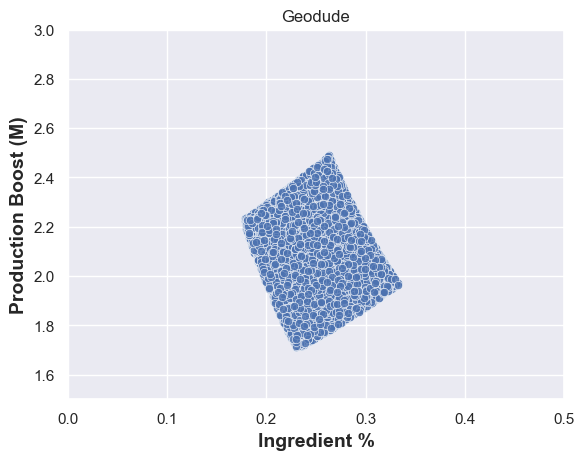

,ingredient%,energy_m
count,76.000000,76.000000
mean,0.248981,2.204968
std,0.005576,0.019227
min,0.239373,2.167574
25%,0.244087,2.189207
50%,0.249137,2.204954
75%,0.253604,2.218655
max,0.258807,2.246663


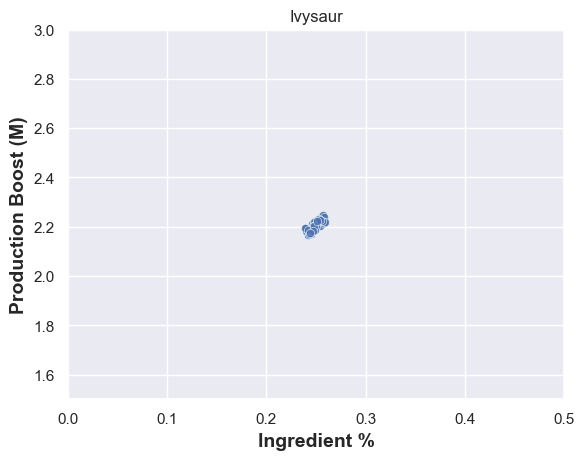

,ingredient%,energy_m
count,558.000000,558.000000
mean,0.235255,2.226773
std,0.010799,0.041029
min,0.213207,2.136094
25%,0.225819,2.197546
50%,0.235301,2.227381
75%,0.244489,2.254090
max,0.257584,2.319340


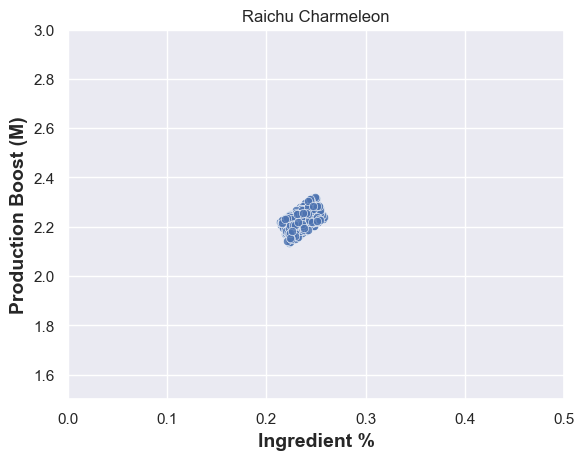

,ingredient%,energy_m
count,1884.000000,1884.000000
mean,0.292477,2.243798
std,0.014724,0.082428
min,0.258305,2.057096
25%,0.281381,2.181502
50%,0.292224,2.240778
75%,0.303038,2.307438
max,0.328181,2.434252


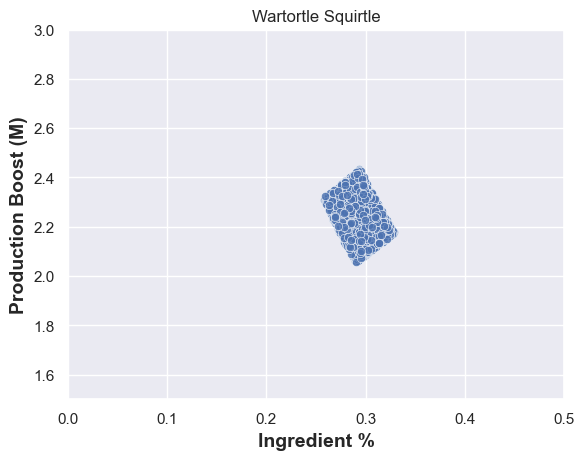

,ingredient%,energy_m
count,829.000000,829.000000
mean,0.204777,2.231607
std,0.012438,0.047272
min,0.180116,2.118279
25%,0.194415,2.199648
50%,0.204719,2.233080
75%,0.215746,2.266378
max,0.228937,2.334866


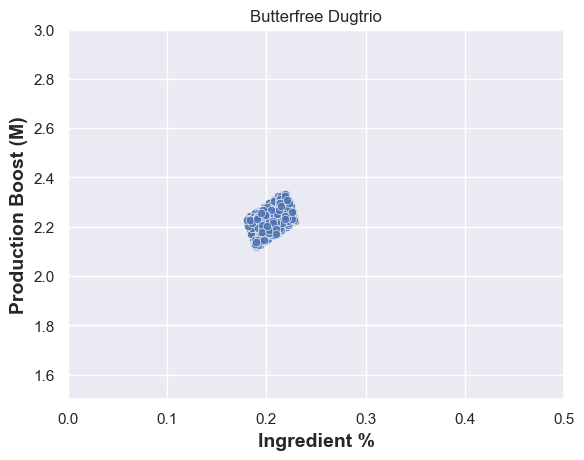

,ingredient%,energy_m
count,1352.000000,1352.000000
mean,0.209087,2.074387
std,0.024214,0.068437
min,0.164714,1.925487
25%,0.188051,2.019927
50%,0.208956,2.073277
75%,0.229301,2.127480
max,0.255339,2.230445


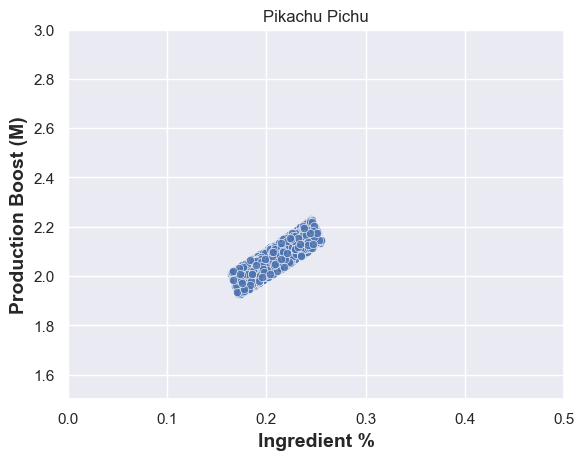

,ingredient%,energy_m
count,3185.000000,3185.000000
mean,0.136576,2.159492
std,0.024836,0.094432
min,0.088363,1.940133
25%,0.115723,2.090976
50%,0.136937,2.159371
75%,0.157689,2.226449
max,0.186479,2.385606


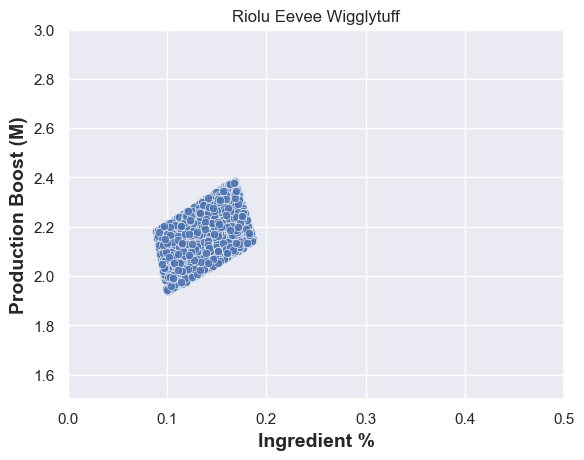

,ingredient%,energy_m
count,929.000000,929.000000
mean,0.187439,2.111790
std,0.009756,0.059258
min,0.166183,1.990347
25%,0.180250,2.064356
50%,0.187230,2.111269
75%,0.194527,2.158815
max,0.209701,2.246527


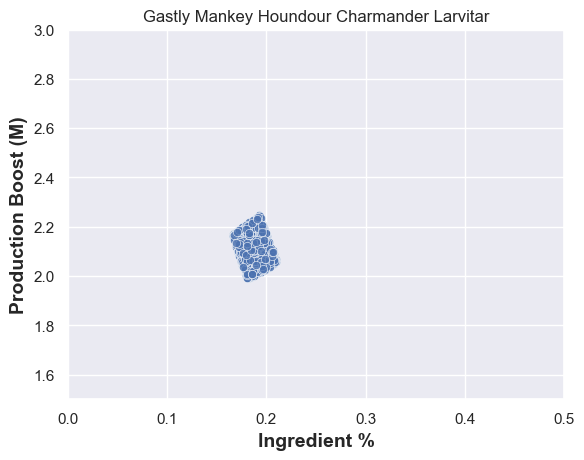

In [13]:

allpts = []

for group in output:
    pts = get_valid_params(group).copy()
    display(pts.describe())
    plot_group(group, pts)
    pts["group"] = " ".join(group)
    allpts.append(pts)

<Axes: xlabel='ingredient%', ylabel='energy_m'>

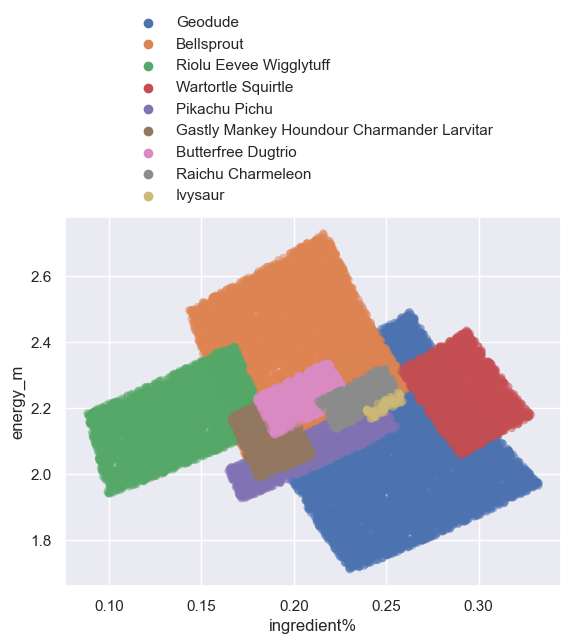

In [14]:
allpts = sorted(allpts, key=lambda x: -len(x.index)) 
#tresh = np.percentile(list(map(lambda x: len(x.index), allpts)), 0.5)
#allpts = list(map(lambda x: x if len(x.index<tresh) else x.sample(tresh), allpts))

df = pd.concat(allpts)

fig, ax = plt.subplots()
sns.scatterplot(data=df,x="ingredient%", y="energy_m",alpha=0.5, hue="group", ax=ax, linewidth=0) #hue_order=orders
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=1, title=None, frameon=False,
)

fig.savefig('clusters.png', transparent=False, bbox_inches='tight')

In [15]:
tresh

0.15

In [16]:
list(map(lambda x: len(x.index), allpts))

[8928, 6432, 3185, 1884, 1352, 929, 829, 558, 76]